# Black Friday Customer Purchase behavior Analysis 

In this notebook, we will go over the exploration and analysis of our dataset marketing.csv. We will perform multiple visualization to understand the nature and relationship of the data. So that we can see if we can apply any data science technique or machine learning algorithm to generate useful data. 

## Import Libraries

In [33]:
import pandas as pd
import numpy as np 
import os

import matplotlib.pyplot as plt
import seaborn as sns 

from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder

# Load File

we will begin with the data, which we already extract, transform and load it to our database. We can go to https://www.openml.org/search?type=data&status=active&id=41540 which is the API to download this dataset. 
This dataset is about cust

In [3]:
os.chdir('..')
data = pd.read_csv('./Data_Engineer/data/marketing.csv')
data.drop(columns = ['Unnamed: 0'], inplace= True)

In [4]:
data.head()

,gender,age,occupation numeric,city_category,stay_in_current_city_years,marital_status,product_category_1,product_category_2,product_category_3,purchase_amount
0,F,0-17,10,A,2,0,1,6,14,15200
1,M,46-50,7,B,2,1,1,8,17,19215
2,M,26-35,20,A,1,1,1,2,5,15665
3,F,51-55,9,A,1,0,5,8,14,5378
4,F,51-55,9,A,1,0,2,3,4,13055


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 166821 entries, 0 to 166820
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   gender                      166821 non-null  object
 1   age                         166821 non-null  object
 2   occupation numeric          166821 non-null  int64 
 3   city_category               166821 non-null  object
 4   stay_in_current_city_years  166821 non-null  object
 5   marital_status              166821 non-null  int64 
 6   product_category_1          166821 non-null  int64 
 7   product_category_2          166821 non-null  int64 
 8   product_category_3          166821 non-null  int64 
 9   purchase_amount             166821 non-null  int64 
dtypes: int64(6), object(4)
memory usage: 12.7+ MB


In [6]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
occupation numeric,166821.0,8.178886,6.487522,0.0,2.0,7.0,14.0,20.0
marital_status,166821.0,0.402839,0.490470,0.0,0.0,0.0,1.0,1.0
product_category_1,166821.0,2.742766,2.573969,1.0,1.0,1.0,4.0,15.0
product_category_2,166821.0,6.896871,4.500288,2.0,2.0,6.0,10.0,16.0
product_category_3,166821.0,12.668243,4.125338,3.0,9.0,14.0,16.0,18.0
purchase_amount,166821.0,11658.114980,5082.287959,185.0,7869.0,11756.0,15626.0,23959.0


There are no outliers present in the dataset when we compare the value of mean and 50% percentile, there is no significant difference. 

#

## Demographic Analysis

this section help us understand the dataset demographically, from genders to age groups, city_category

In [7]:
data['gender'].value_counts()/len(data) * 100

gender
M    77.464468
F    22.535532
Name: count, dtype: float64

<Axes: xlabel='gender', ylabel='count'>

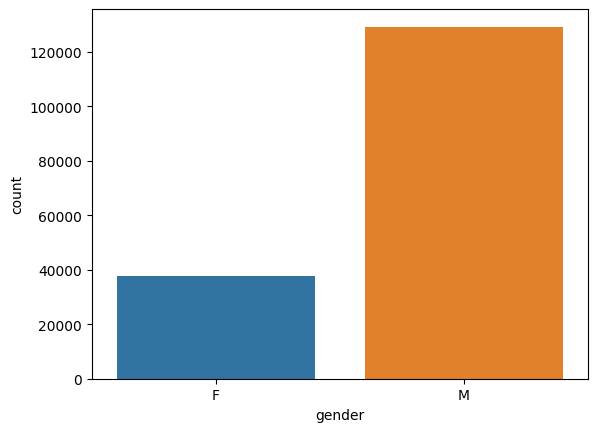

In [15]:
sns.countplot(data = data , x = 'gender', hue = 'gender')

we observe that we have more Male customers than female

In [8]:
data['age'].value_counts()/len(data) * 100

age
26-35    40.128041
36-45    19.952524
18-25    18.772217
46-50     8.016976
51-55     6.693402
55+       3.515744
0-17      2.921095
Name: count, dtype: float64

<Axes: xlabel='age', ylabel='count'>

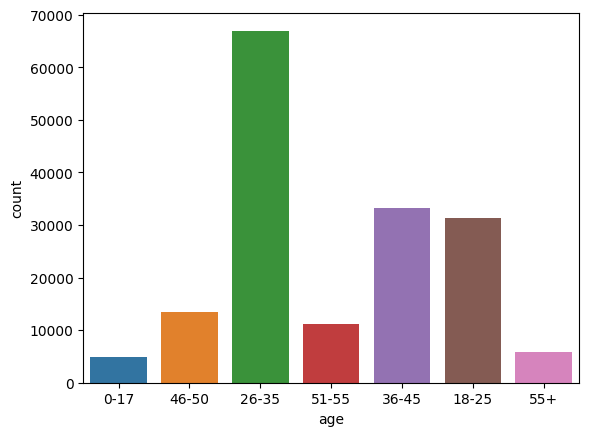

In [14]:
sns.countplot(data = data , x = 'age', hue = 'age')

we observe that the most customer are in this range 26-35 years old

<Axes: xlabel='city_category', ylabel='count'>

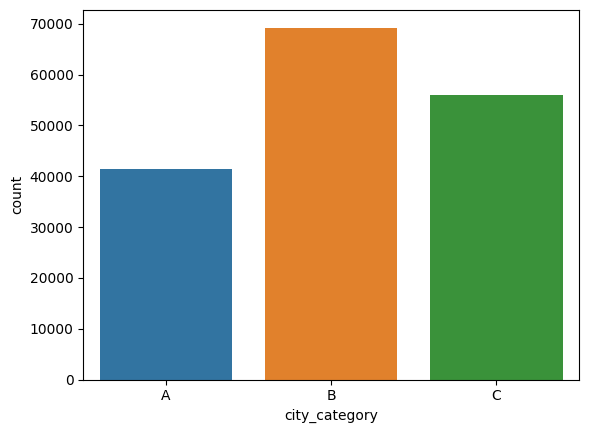

In [13]:
sns.countplot(data= data, x = 'city_category', hue = 'city_category' )

we observed that more customer locates in city category B and C, compare to A 

<Axes: xlabel='stay_in_current_city_years', ylabel='count'>

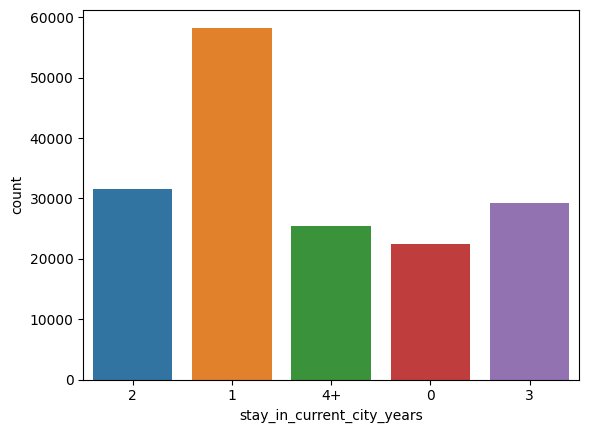

In [12]:
sns.countplot(data= data, x = 'stay_in_current_city_years', hue = 'stay_in_current_city_years' )

we can see from the chart that, the majority of customer group are the one whole just live in the current city within 1 year, maybe their moving leads them to buy more compare to other groups

<Axes: xlabel='occupation numeric', ylabel='count'>

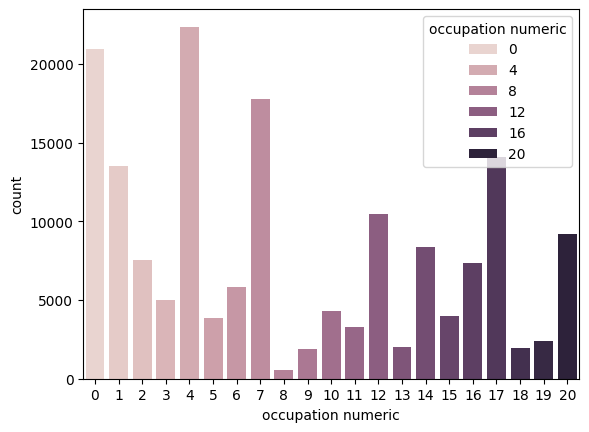

In [18]:
sns.countplot(data = data, x = 'occupation numeric', hue = 'occupation numeric')

Occupation 8 is extremely low compare to others. In Constrast, occupation 4 have the highest group

## Purchase Amount Distribution Analysis

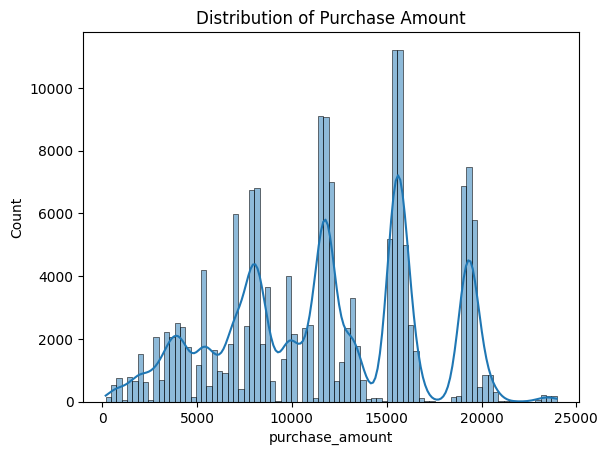

In [14]:
#Plot histograms for to understand the distribution of spending 
sns.histplot(data['purchase_amount'], kde = True)
plt.title('Distribution of Purchase Amount')
plt.show()

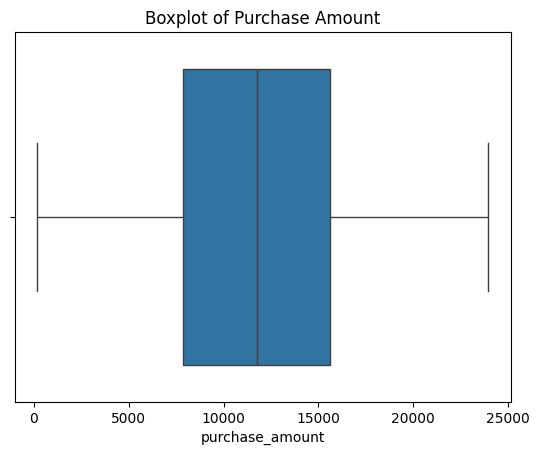

In [16]:
sns.boxplot(x=data['purchase_amount'])
plt.title('Boxplot of Purchase Amount')
plt.show()

we can see that there are high percentage customer in the range of $10,000 to $15,000 purchase amount.

In [20]:
data.columns

Index(['gender', 'age', 'occupation numeric', 'city_category',
       'stay_in_current_city_years', 'marital_status', 'product_category_1',
       'product_category_2', 'product_category_3', 'purchase_amount'],
      dtype='object')

C:\Users\289380\AppData\Local\Temp\ipykernel_47944\1136308929.py:2: FutureWarning: The provided callable <function sum at 0x0000022873CB9760> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  occupation_plot = data.pivot_table(index='occupation numeric', values= 'purchase_amount', aggfunc= np.sum)


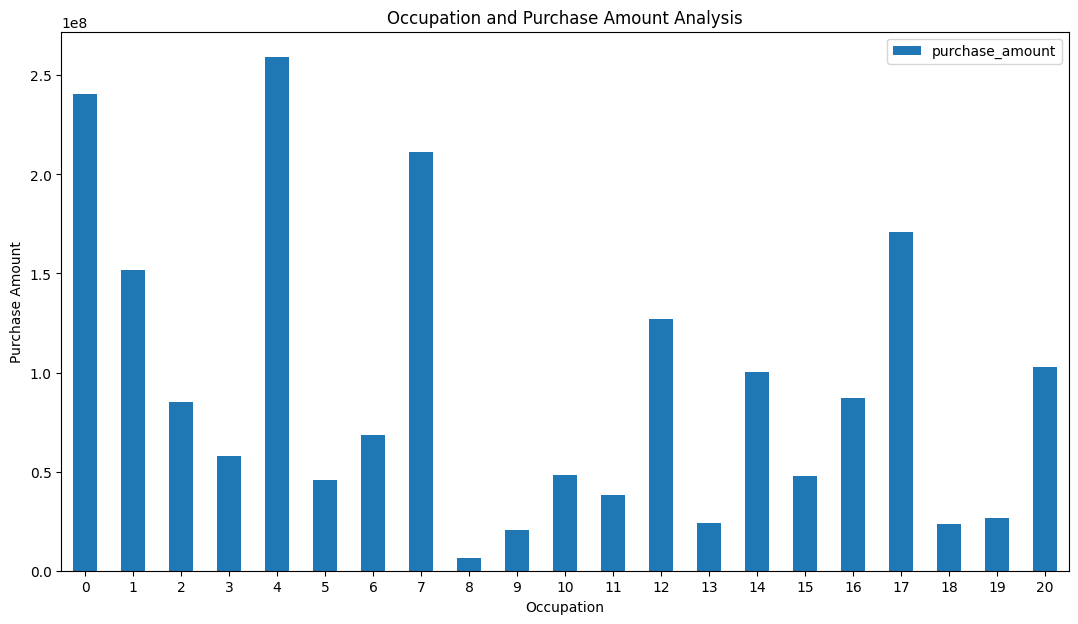

In [26]:
#Bivariate Analysis
occupation_plot = data.pivot_table(index='occupation numeric', values= 'purchase_amount', aggfunc= np.sum)
occupation_plot.plot(kind='bar', figsize=(13,7))
plt.xlabel('Occupation')
plt.ylabel('Purchase Amount')
plt.title('Occupation and Purchase Amount Analysis')
plt.xticks(rotation=0)
plt.show()

We can observe that occupation 8 shop the least , and occupation 0 and 4 purchase the most in term of total dollar

C:\Users\289380\AppData\Local\Temp\ipykernel_47944\3928077809.py:2: FutureWarning: The provided callable <function sum at 0x0000022873CB9760> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  occupation_plot = data.pivot_table(index='age', values= 'purchase_amount', aggfunc= np.sum)


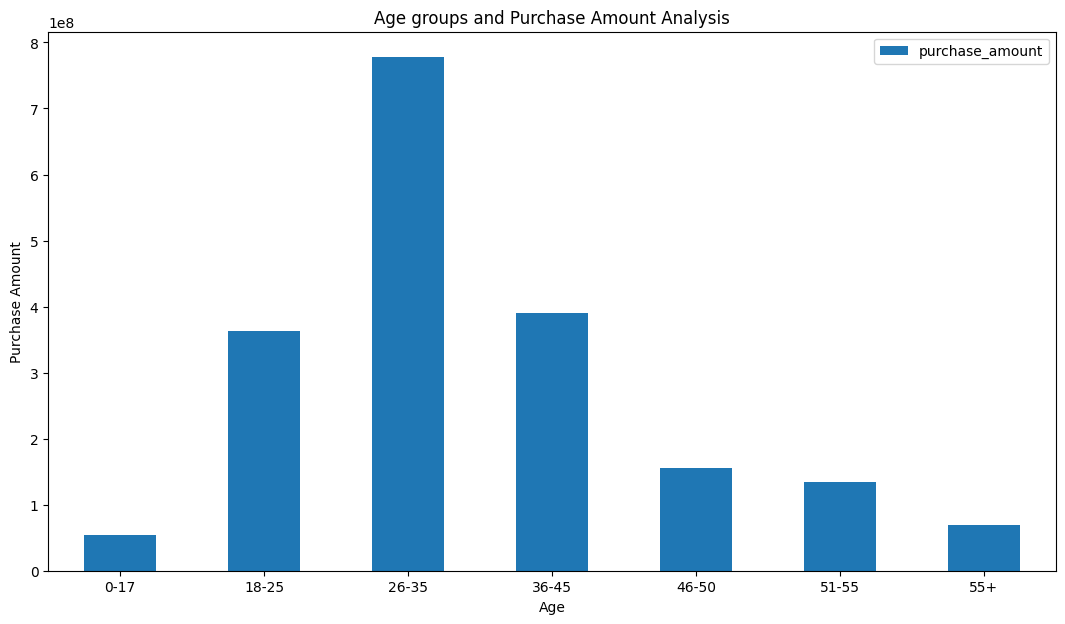

In [27]:
#Bivariate Analysis
age_plot = data.pivot_table(index='age', values= 'purchase_amount', aggfunc= np.sum)
age_plot.plot(kind='bar', figsize=(13,7))
plt.xlabel('Age')
plt.ylabel('Purchase Amount')
plt.title('Age groups and Purchase Amount Analysis')
plt.xticks(rotation=0)
plt.show()

if we sum the purchase amount. we can observe that the 26-35 age group purchase the most compare to other group

## Product Category Analysis

This section focusing on investigating which product categories are most popular and their impact on purchase amount

C:\Users\289380\AppData\Local\Temp\ipykernel_47944\2526061544.py:2: FutureWarning: The provided callable <function sum at 0x0000022873CB9760> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  product_category_1_plot = data.pivot_table(index='product_category_1', values= 'purchase_amount', aggfunc= np.sum)


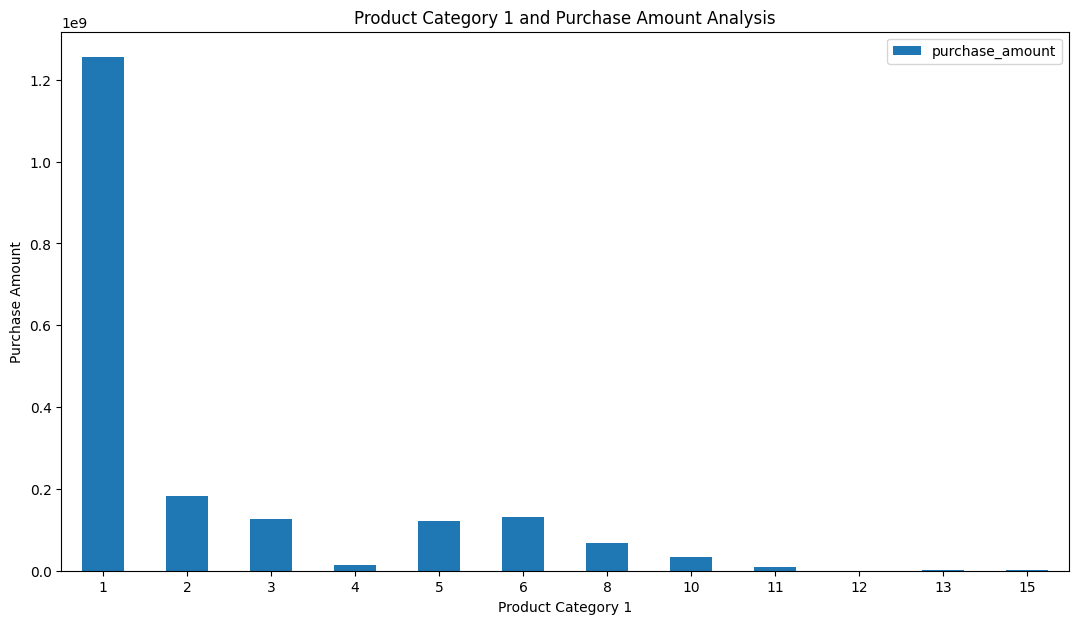

In [29]:
#Bivariate Analysis
product_category_1_plot = data.pivot_table(index='product_category_1', values= 'purchase_amount', aggfunc= np.sum)
product_category_1_plot.plot(kind='bar', figsize=(13,7))
plt.xlabel('Product Category 1')
plt.ylabel('Purchase Amount')
plt.title('Product Category 1 and Purchase Amount Analysis')
plt.xticks(rotation=0)
plt.show()

We observed that Product 1 brings the most revenue in term of total dollar amount compare to other product in product category 1

C:\Users\289380\AppData\Local\Temp\ipykernel_47944\1923287934.py:2: FutureWarning: The provided callable <function sum at 0x0000022873CB9760> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  product_category_2_plot = data.pivot_table(index='product_category_2', values= 'purchase_amount', aggfunc= np.sum)


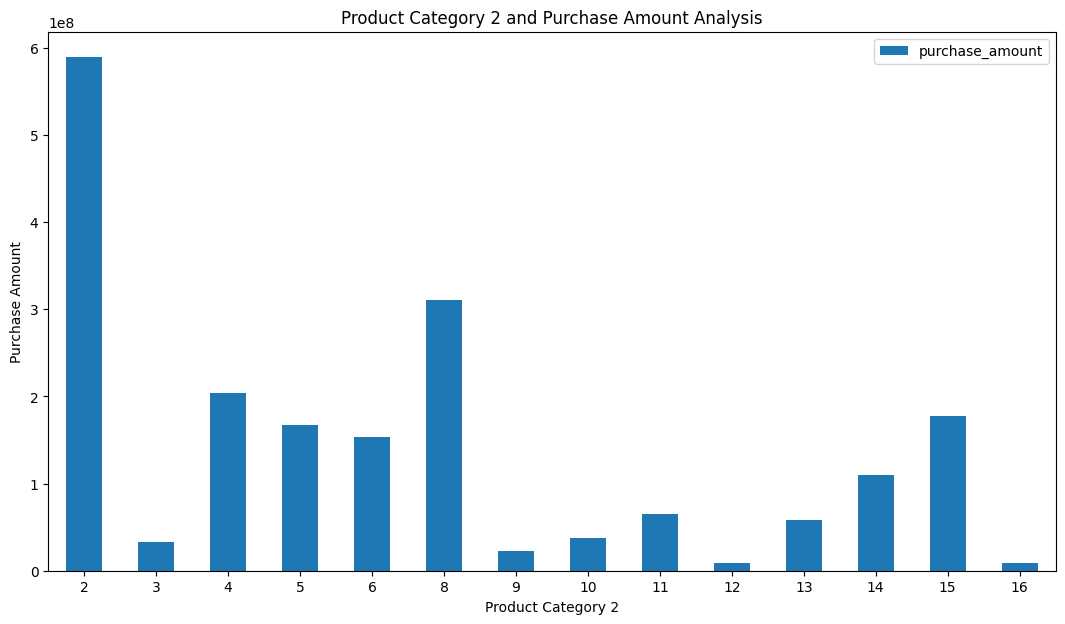

In [30]:
#Bivariate Analysis
product_category_2_plot = data.pivot_table(index='product_category_2', values= 'purchase_amount', aggfunc= np.sum)
product_category_2_plot.plot(kind='bar', figsize=(13,7))
plt.xlabel('Product Category 2')
plt.ylabel('Purchase Amount')
plt.title('Product Category 2 and Purchase Amount Analysis')
plt.xticks(rotation=0)
plt.show()

We observed that Product 2 brings the most revenue in term of total dollar amount compare to other product in product category 2

C:\Users\289380\AppData\Local\Temp\ipykernel_47944\1852104281.py:2: FutureWarning: The provided callable <function sum at 0x0000022873CB9760> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  product_category_3_plot = data.pivot_table(index='product_category_3', values= 'purchase_amount', aggfunc= np.sum)


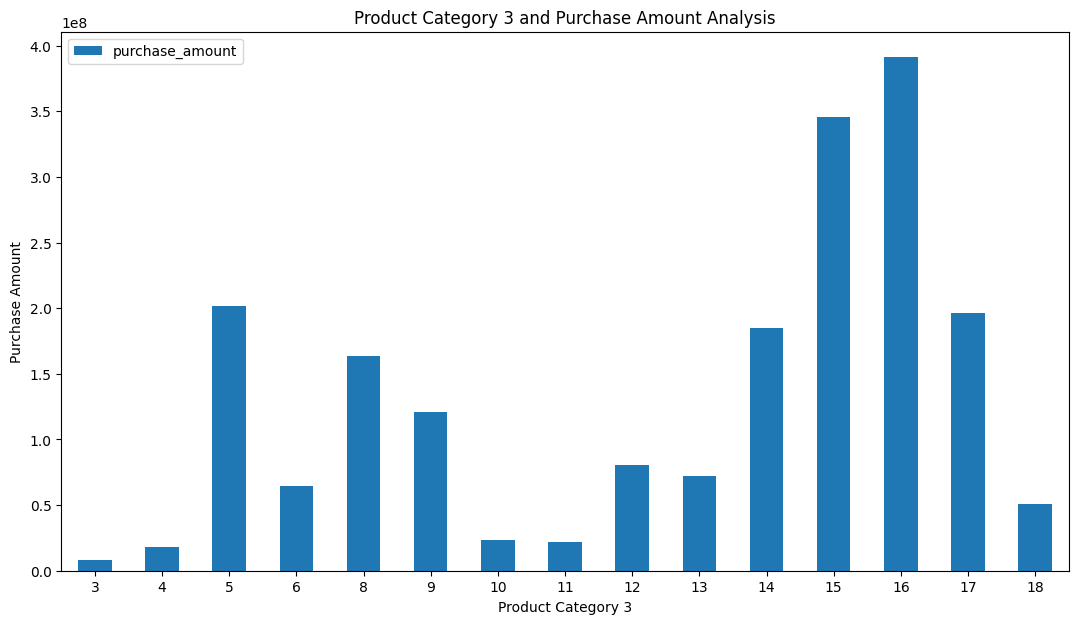

In [32]:
#Bivariate Analysis
product_category_3_plot = data.pivot_table(index='product_category_3', values= 'purchase_amount', aggfunc= np.sum)
product_category_3_plot.plot(kind='bar', figsize=(13,7))
plt.xlabel('Product Category 3')
plt.ylabel('Purchase Amount')
plt.title('Product Category 3 and Purchase Amount Analysis')
plt.xticks(rotation=0)
plt.show()

product 15,16  in product category 3 bring the most revenue compare to other product in product category 3

### Correlation Analysis

Label encoding to convert the categorical columns into numerical columns to produce heatmaps

In [38]:
cols = ['gender','age','city_category','stay_in_current_city_years']
label = LabelEncoder()
for col in cols:
    data[col] = label.fit_transform(data[col])

In [39]:
data.head()

,gender,age,occupation numeric,city_category,stay_in_current_city_years,marital_status,product_category_1,product_category_2,product_category_3,purchase_amount
0,0,0,10,0,2,0,1,6,14,15200
1,1,4,7,1,2,1,1,8,17,19215
2,1,2,20,0,1,1,1,2,5,15665
3,0,5,9,0,1,0,5,8,14,5378
4,0,5,9,0,1,0,2,3,4,13055


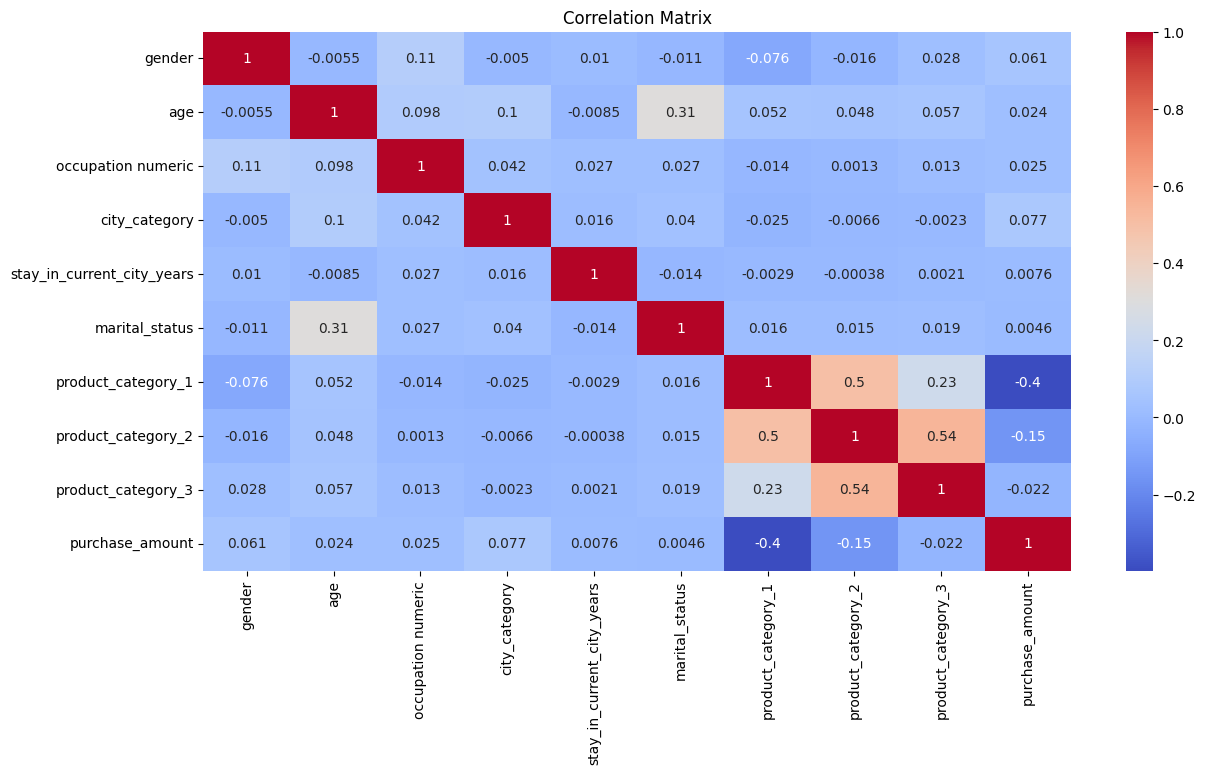

In [40]:
corr = data.corr()
plt.figure(figsize=(14,7))
sns.heatmap(corr, annot = True, cmap = 'coolwarm')
plt.title('Correlation Matrix')
plt.show()

purchase amount is most correlate with product_category_1 and product_category_3. 
Age and Marital status also have positive correlation

## Customer Segmentation

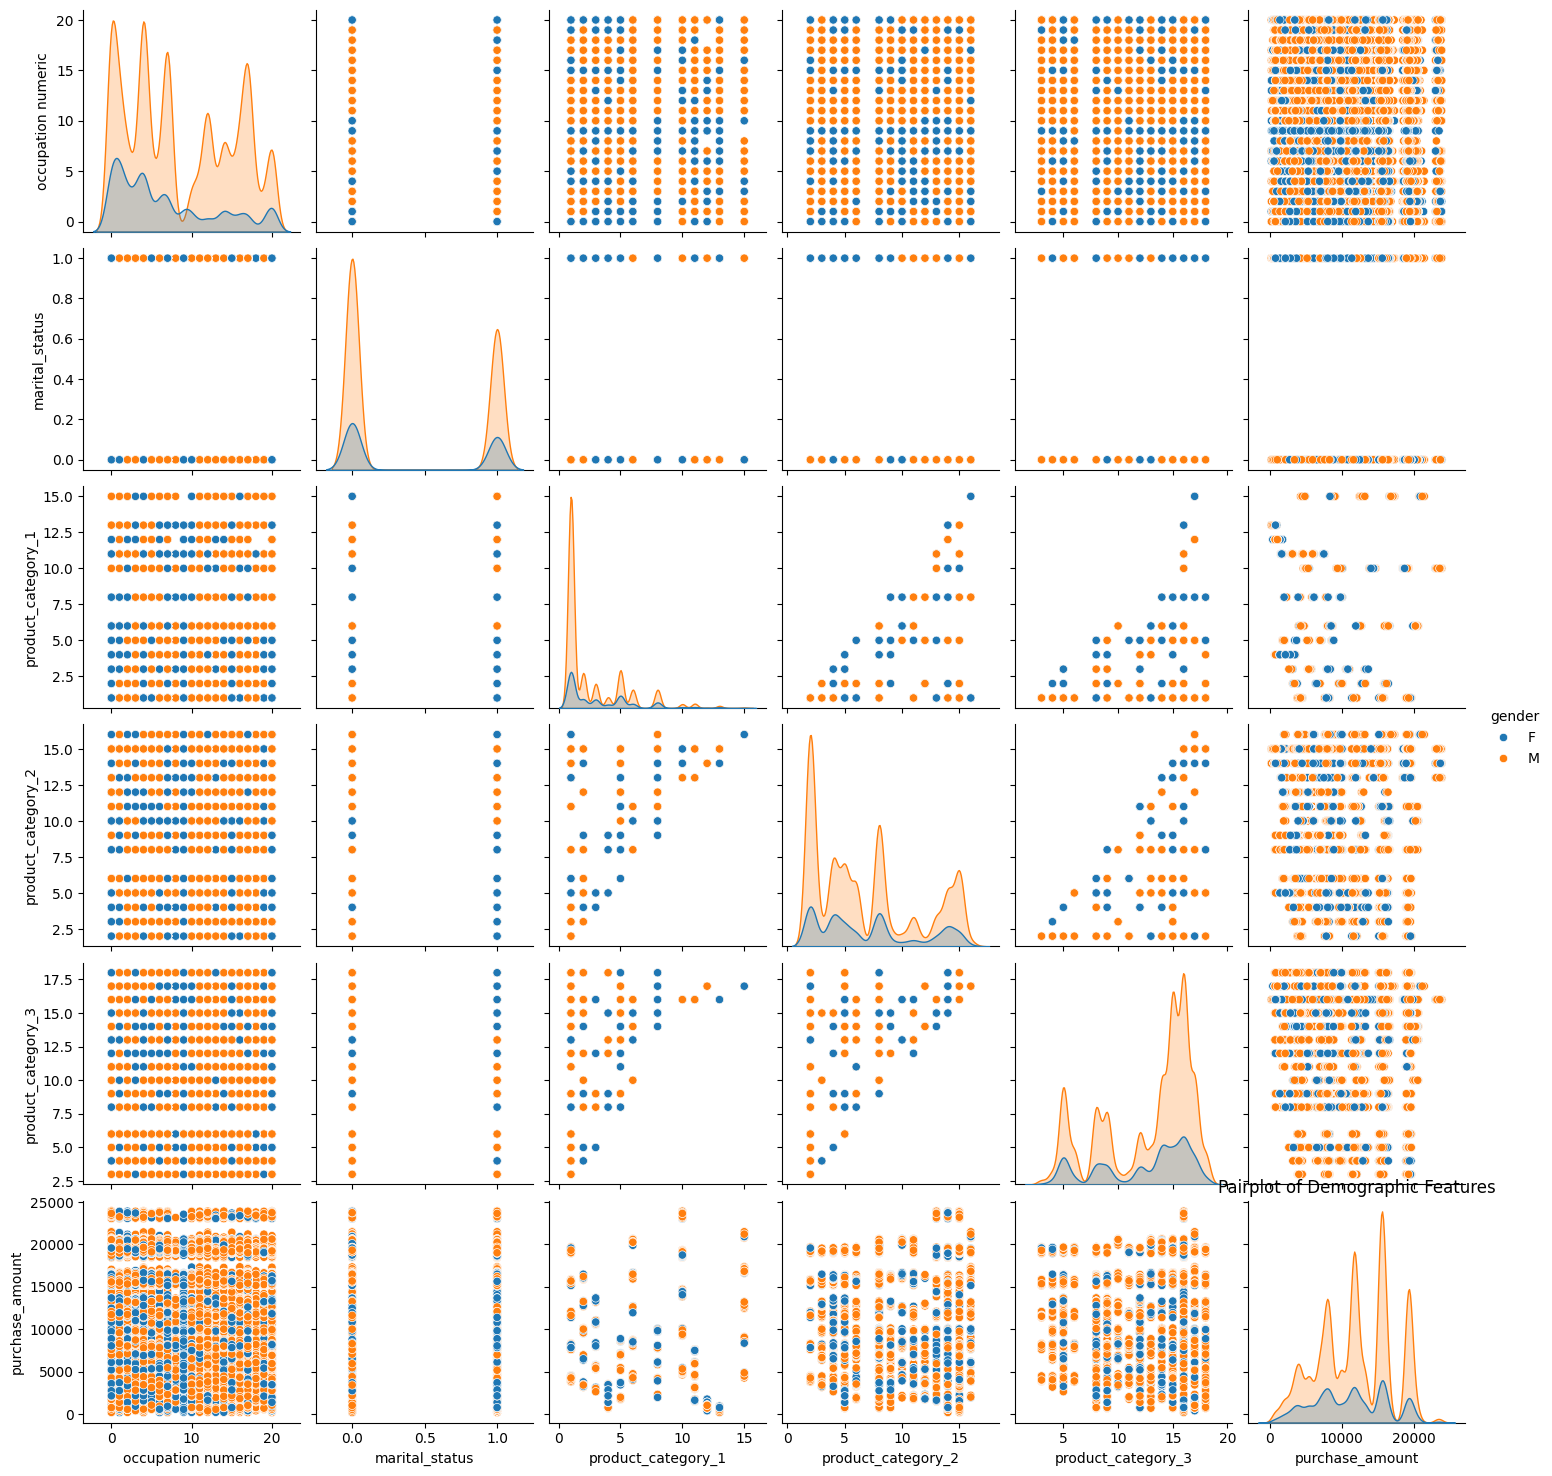

In [30]:
sns.pairplot(data, hue='gender')
plt.title('Pairplot of Demographic Features')
plt.show()

This chart to show to marital status different in term of different variables. When we looked at the purchase amount distribution in marital status , we can see that male customer have more purchase amount, compare to female